先做一些准备工作：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']

np.random.seed(1)
df = pd.DataFrame({'x':np.arange(5), 
      'y':np.random.randint(0, 10, (5,)), 
      'a':abs(np.random.randn(5)),
      'b':abs(np.random.randn(5))
                  })
df.to_markdown('tmp.md')

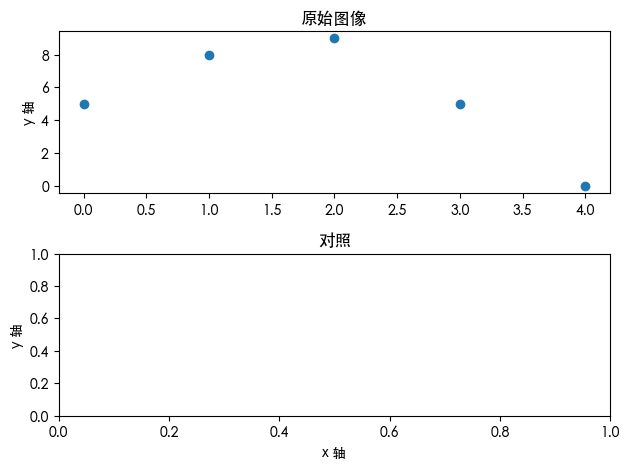

In [2]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y'])
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('对照')

fig.tight_layout()
plt.show()

上一节讨论了折线图。事实上折线图 API 也可以画散点图（`fmt=''` 同时定义 `marker`），但是同一组数据绘制的点完全一样。散点图可以避免这个问题。

函数格式：
```python
scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
# 基础用法
## `x`、`y`、`data`：数据来源，与 `plot` 相同

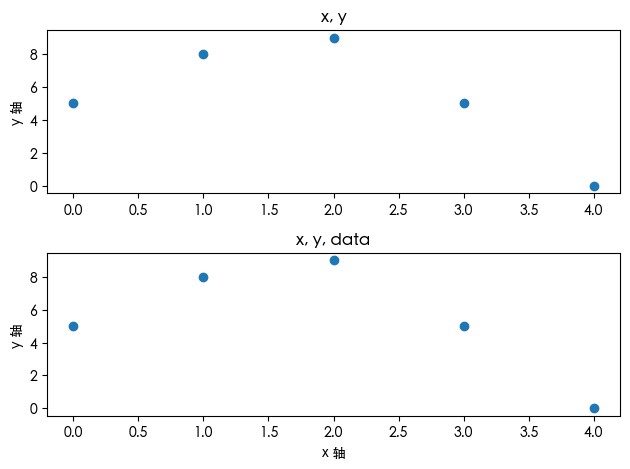

In [3]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('x, y')

ax2.scatter('x', 'y', data=df) # 显式传入 x，y，data
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('x, y, data')

fig.tight_layout()
plt.show()

## `s`：浮点数或数组，数据点大小

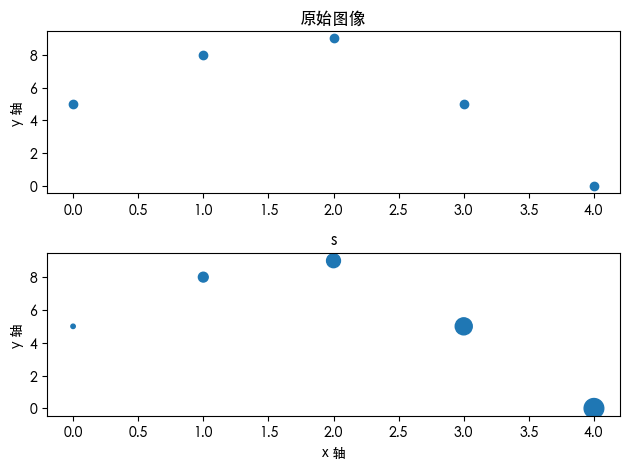

In [4]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], s=[10, 50, 100, 150, 200])
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('s')

fig.tight_layout()
plt.savefig('03.png')
plt.show()

## `c`：数组或列表，数据点的颜色
可能取值有：
- 标量或序列，映射到参数 `cmap` 和 `norm` 上。即先经过 `norm` 将数值转换成 [0, 1] 之间的数，然后取 `cmap` 上对应数值的颜色。

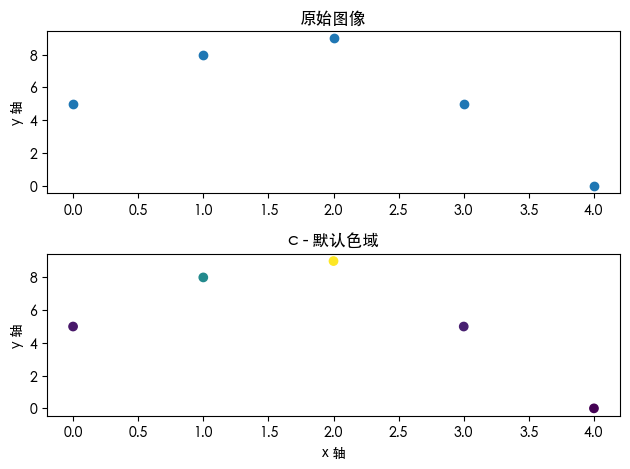

In [5]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=df['a'])
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('c - 默认色域')

fig.tight_layout()
plt.savefig('04.png')
plt.show()

- 二维矩阵，行是 RGB 或 RGBA 坐标。RGB 坐标的格式是 [r, g, b]，r，g，b 的取值范围是 [0, 1]。

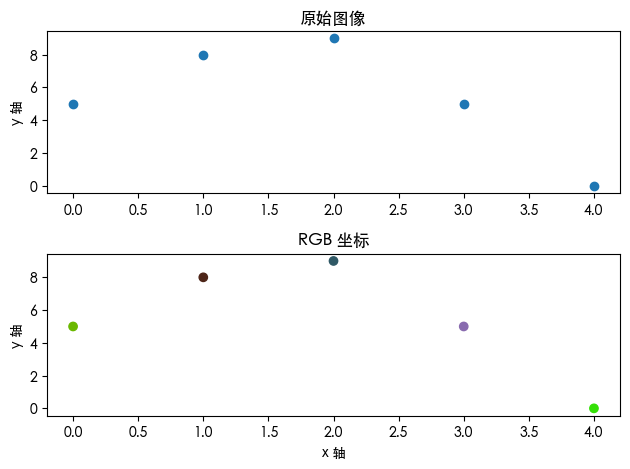

In [6]:
np.random.seed(1)
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=np.random.rand(5, 3)) # RGB 坐标
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('RGB 坐标')

fig.tight_layout()
plt.savefig('05.png')
plt.show()

- 与数据点等长的颜色序列，既可使用完整颜色名称，也可使用单一缩写

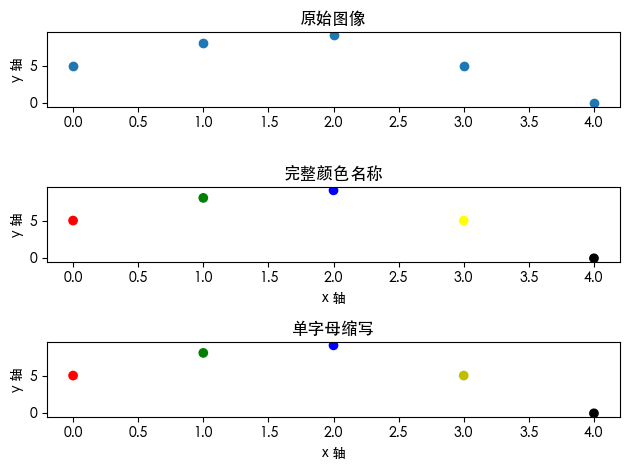

In [7]:
np.random.seed(1)
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=['red', 'green', 'blue', 'yellow', 'black']) # 完整颜色名称
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('完整颜色名称')

ax3.scatter(df['x'], df['y'], c=['r', 'g', 'b', 'y', 'k']) # 单字母缩写
ax3.set_xlabel('x 轴')
ax3.set_ylabel('y 轴')
ax3.set_title('单字母缩写')

fig.tight_layout()
plt.show()

- 单一的颜色字符串

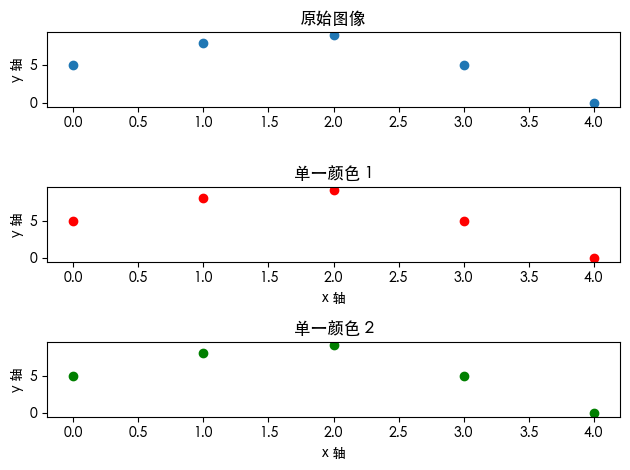

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c='red') # 单一颜色 1
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('单一颜色 1')

ax3.scatter(df['x'], df['y'], c='g') # 单一颜色 2
ax3.set_xlabel('x 轴')
ax3.set_ylabel('y 轴')
ax3.set_title('单一颜色 2')

fig.tight_layout()
plt.show()

## `marker`：数据点的形状
继承自 `matplotlib.markers.MarkerStyle`，默认与 `rcParams["scatter.marker"]` 设置相同，默认为 `o`。与 `plot` 中的同名参数相同。同一组数据只能使用一个形状。

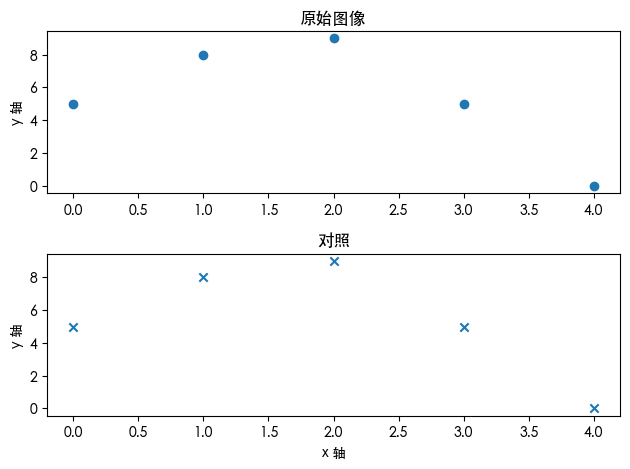

In [9]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], marker='x')
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('对照')

fig.tight_layout()
plt.show()

## - `cmap`：色域
默认与 `rcParams["image.cmap"]` 设置相同，默认为 `'viridis'`，若 `c` 为 RGB 则此参数无效。后续会详述。

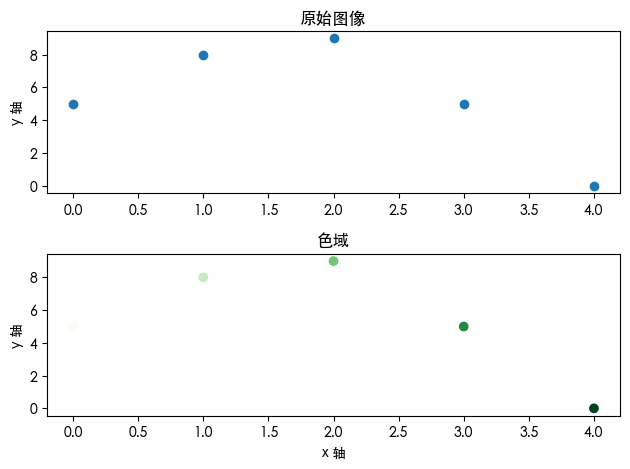

In [10]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=np.arange(5), cmap='Greens')
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('色域')

fig.tight_layout()
plt.show()

## `norm`：
将参数 `c` 的数值转换成 [0, 1] 的方法，默认是线性转换。
- 若 `c` 为 RGB 则此参数无效
- 一个 `matplotlib.colors.Normalize` 实例

一个简单的例子，模拟了线性归一化，与上一节的图是一样的：

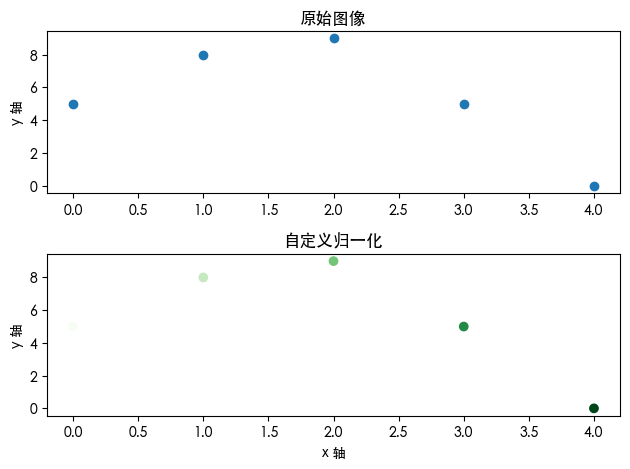

In [11]:
import matplotlib
class New_Norm(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, clip=False):
        super().__init__()
        self._vmin = vmin
        self._vmax = vmax
        self._clip = clip
        
    def __call__(self, values):
        _min = self._vmin if self._vmin else min(values)
        _max = self._vmax if self._vmax else max(values)
        res = (np.array(values) - _min) / _max
        return res
new_norm = New_Norm()

fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=np.arange(5), cmap='Greens', norm=new_norm)
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('自定义归一化')

fig.tight_layout()
plt.show()

- 一个 `matplotlib.scale.get_scale_names()` 里预置的归一化方法

In [12]:
import matplotlib
print(matplotlib.scale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


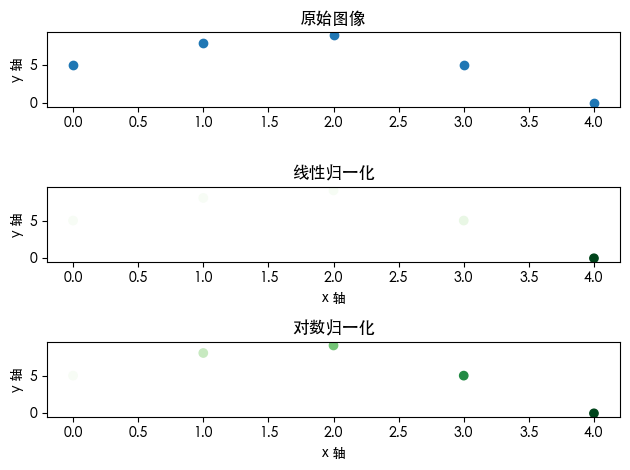

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=[1, 10, 100, 1000, 10000], cmap='Greens', norm='linear') # 线性归一化
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('线性归一化')

ax3.scatter(df['x'], df['y'], c=[1, 10, 100, 1000, 10000], cmap='Greens', norm='log') # 对数归一化
ax3.set_xlabel('x 轴')
ax3.set_ylabel('y 轴')
ax3.set_title('对数归一化')

fig.tight_layout()
plt.show()

## `vmin`、`vmax`：色域的取值极值
先截断，然后归一化
- 不能与实例化的 `norm` 同时使用
- 可与字符串 `norm` 同时使用
- `c` 为 RGB 时，此参数无效

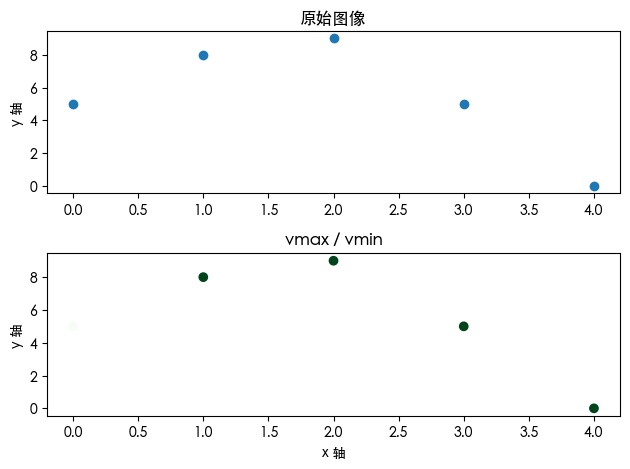

In [14]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], c=np.arange(5), vmin=0.25, vmax=0.75, cmap='Greens')
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('vmax / vmin')

fig.tight_layout()
plt.show()

## `alpha` 
透明度，[0, 1]之间的浮点数
0 为完全透明，1 或 `None` 为完全不透明，默认为 `None`

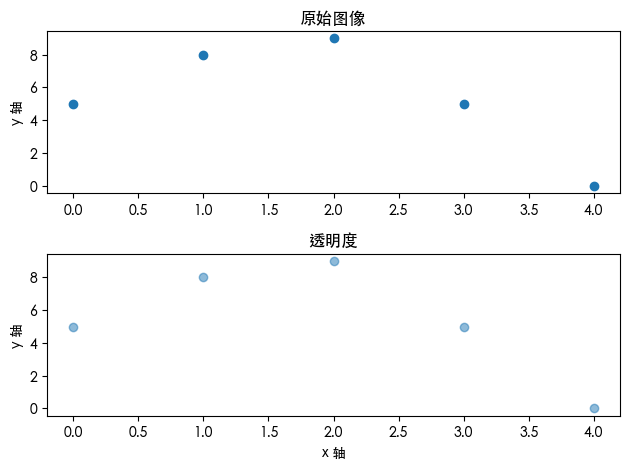

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], alpha=0.5)
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('透明度')

fig.tight_layout()
plt.show()

## `linewidths`
数据点边线的宽度，默认值取 `rcParams["lines.linewidth"]`，默认值为 1.5。

## `edgecolors`
数据点边线的颜色，默认值取 `rcParams["scatter.edgecolors"]`，默认值为 `face`，即与数据点主体颜色相同。可取值为 `face`、`none`、或颜色字符串。

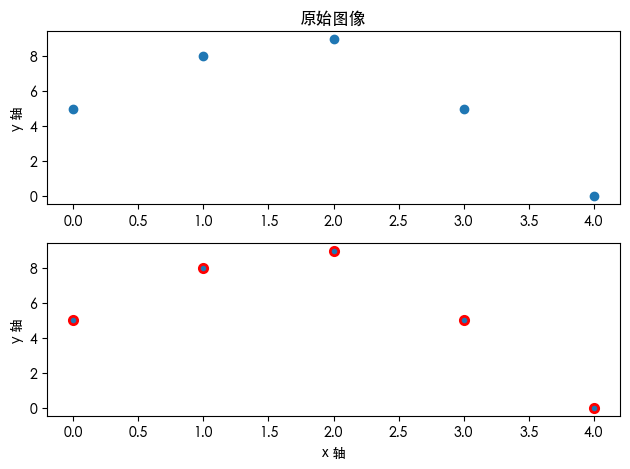

In [16]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(df['x'], df['y']) # 显式传入 x，y
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.scatter(df['x'], df['y'], linewidths=2, edgecolors='red')
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('')

fig.tight_layout()
plt.show()

## `plotnonfinite`
是否显示 `inf`、`-inf`、`nan` 值。暂时没有发现如何工作。

## `**kwargs`
接受 `matplotlib.collections.Collection` 的参数：
```python
matplotlib.collections.Collection(*, edgecolors=None, facecolors=None, linewidths=None, linestyles='solid', capstyle=None, joinstyle=None, antialiaseds=None, offsets=None, offset_transform=None, norm=None, cmap=None, pickradius=5.0, hatch=None, urls=None, zorder=1, **kwargs)
```
主要参数多有重复，不再赘述。